In [99]:
%reset -f 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.optimize import curve_fit
from scipy.stats import norm
import time
import matplotlib.animation as animation
matplotlib.rcParams.update({'font.size': 12})

<IPython.core.display.Javascript object>


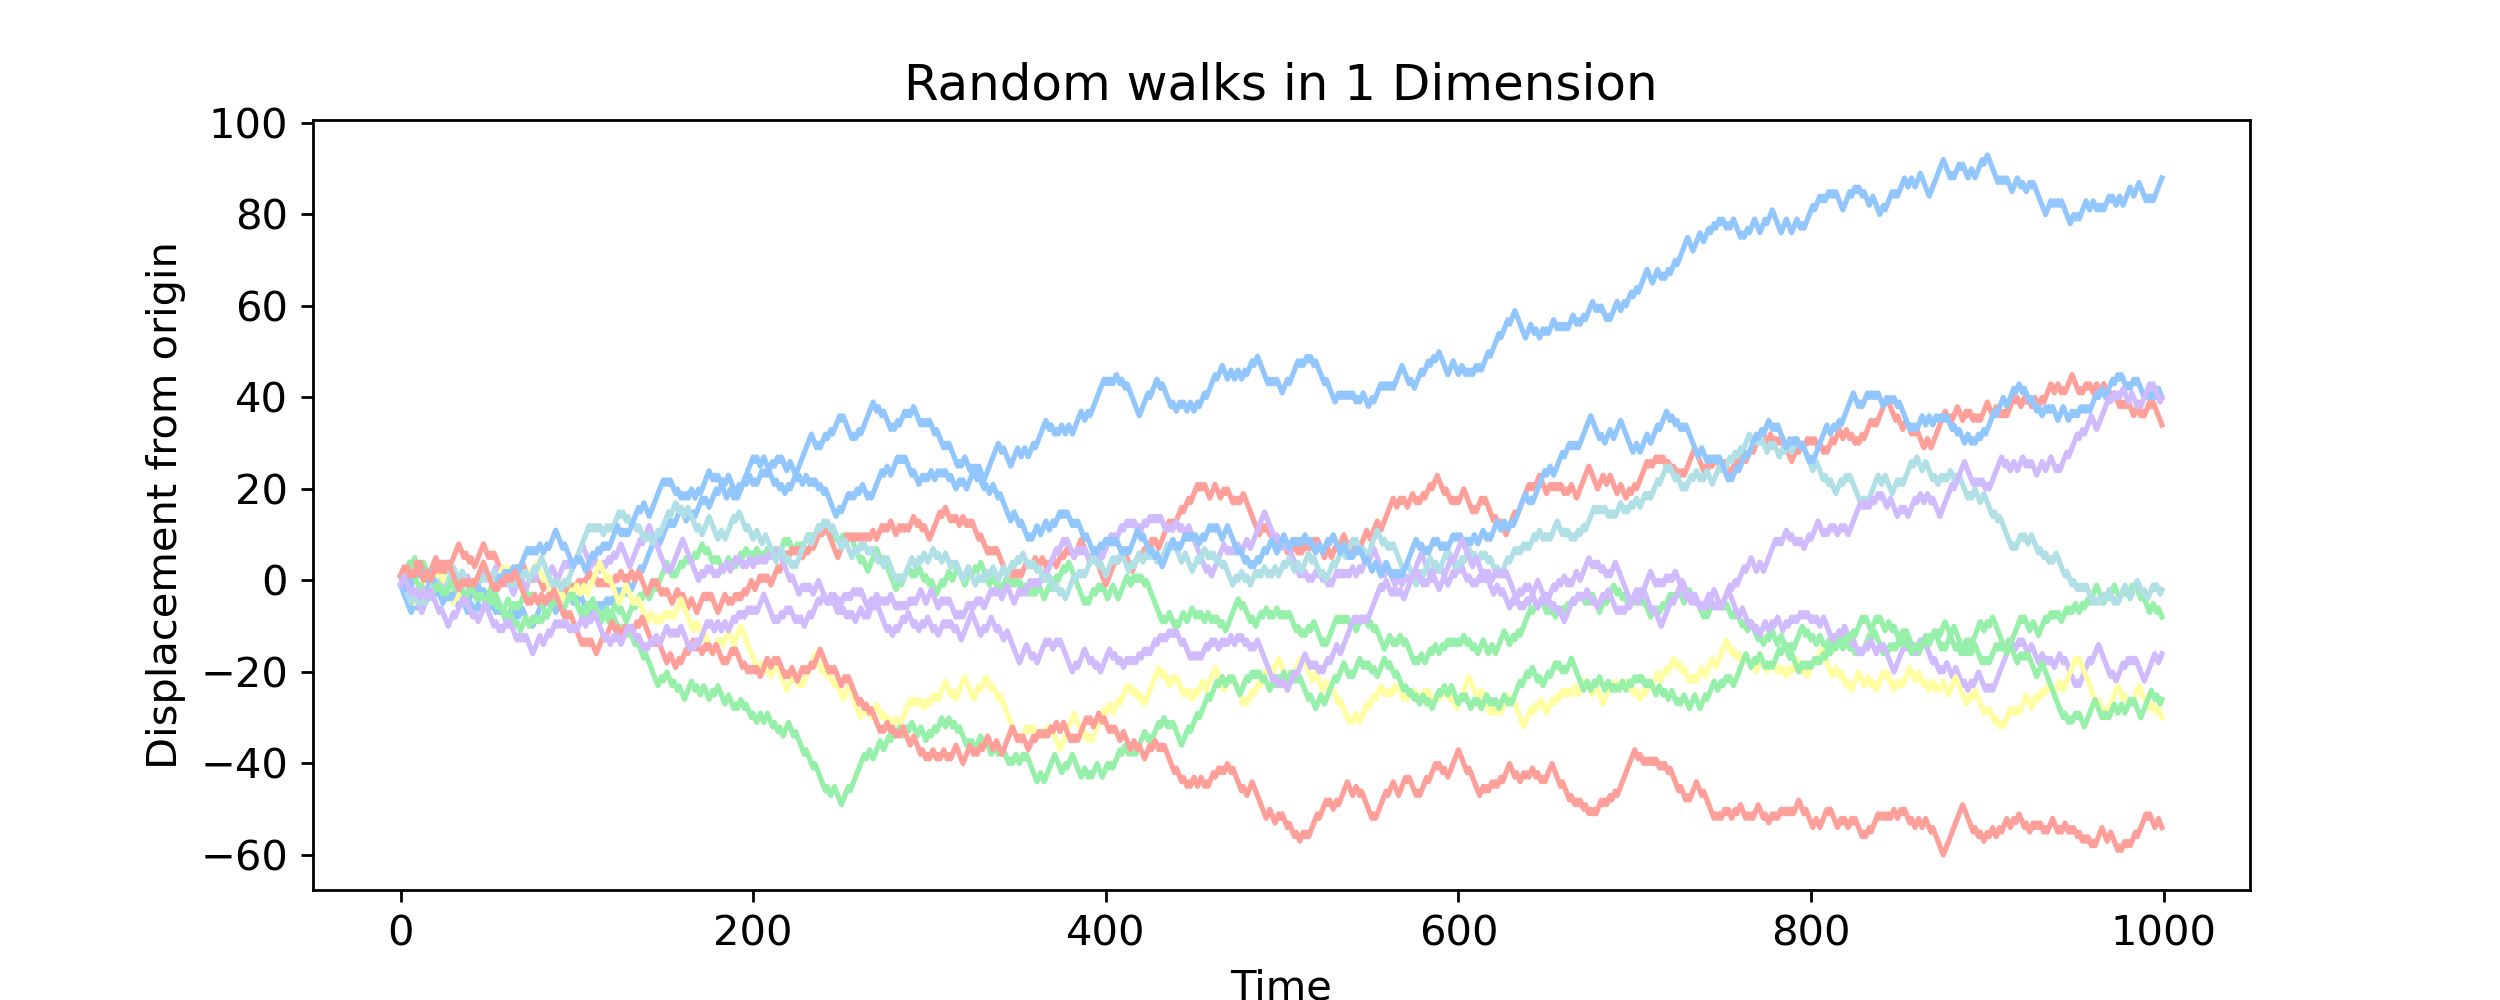

In [101]:
def randwalks(nsteps,nwalkers):
    
    xx = np.zeros([nsteps,nwalkers])
    steps = np.random.choice([-1,1],size = xx.shape)
    xx = np.cumsum(steps, axis=0)
    return xx


xx = randwalks(1000,10)

plt.figure(figsize=[10,4])
plt.plot(xx)
plt.xlabel('Time')
plt.ylabel('Displacement from origin')
plt.title('Random walks in 1 Dimension');

In [44]:
np.shape(xx)

(100, 3)

<IPython.core.display.Javascript object>


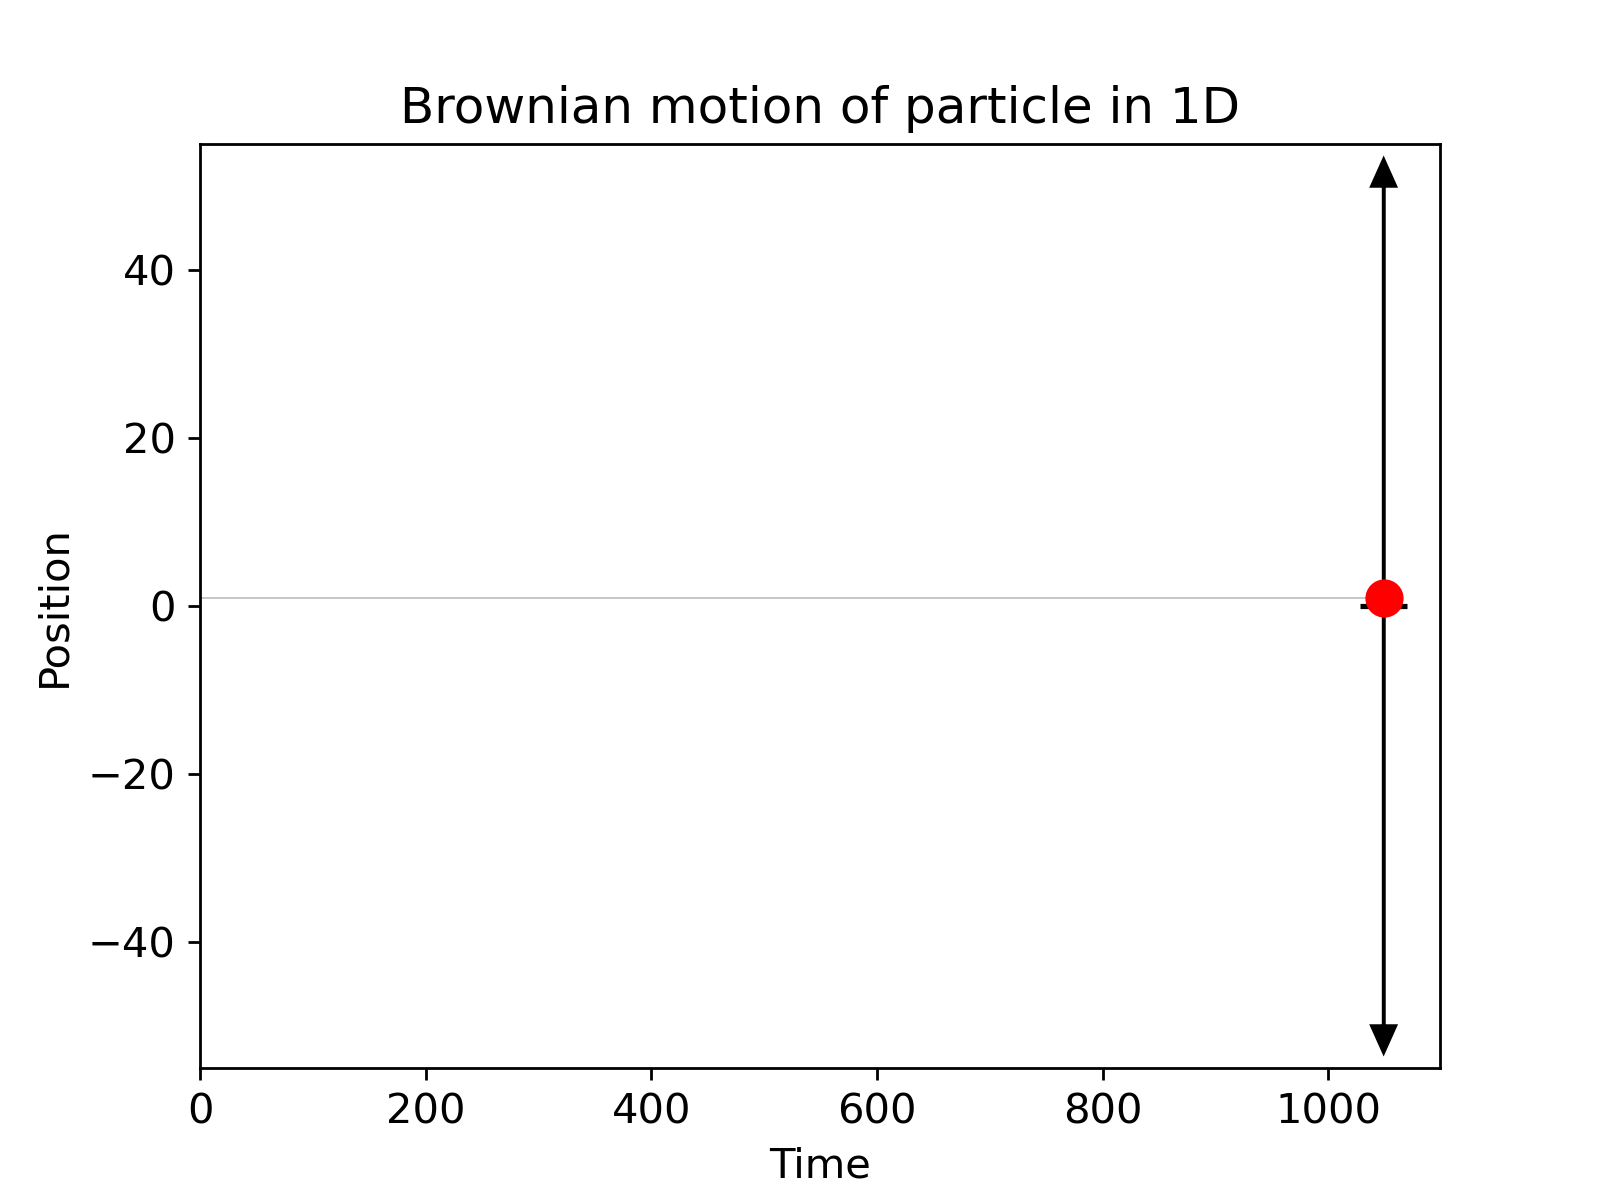

MovieWriter ffmpeg unavailable; using Pillow instead.


In [108]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

nt = 1000
nw = 3
xx = randwalks(nt,nw)
tt = np.arange(0,len(xx),1)


fig = plt.figure()
xmax = np.max(np.abs(xx))
ax = plt.axes(xlim=(0, np.max(tt)*1.1), ylim=(-1.1*xmax, 1.1*xmax))
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_title('Brownian motion of particle in 1D')

line,  = ax.plot([], [], 'r.',ms=20,zorder=10) 
line1, = ax.plot([], [],'k',lw=1)
line2, = ax.plot([],[],'silver',lw=0.5)


tparticle = max(tt)*1.05
head_width = nt/12/4
head_length = xmax/16
ax.arrow(tparticle, 0, 0, xmax,
         head_width=head_width,
         head_length=head_length,
         fc='k')
ax.arrow(tparticle, 0, 0, -xmax,
        head_width=head_width,
         head_length=head_length,
         fc='k')
ax.hlines(0,tparticle*0.98,1.02*tparticle,'k')

def animate(i):
    
    y = xx[i,1]
    line.set_data((tparticle, y))
    line1.set_data((tt[:i],xx[:i,1]))
    line2.set_data(([tt[i],tparticle]),[y,y])
    return line,

anim = FuncAnimation(fig, animate,
                               frames=nt, interval=30, blit=True)

plt.show()
anim.save('brownian_1d.gif',dpi=100)

In [107]:
anim.save('brownian_1d.gif',dpi=100)

MovieWriter ffmpeg unavailable; using Pillow instead.


<IPython.core.display.Javascript object>


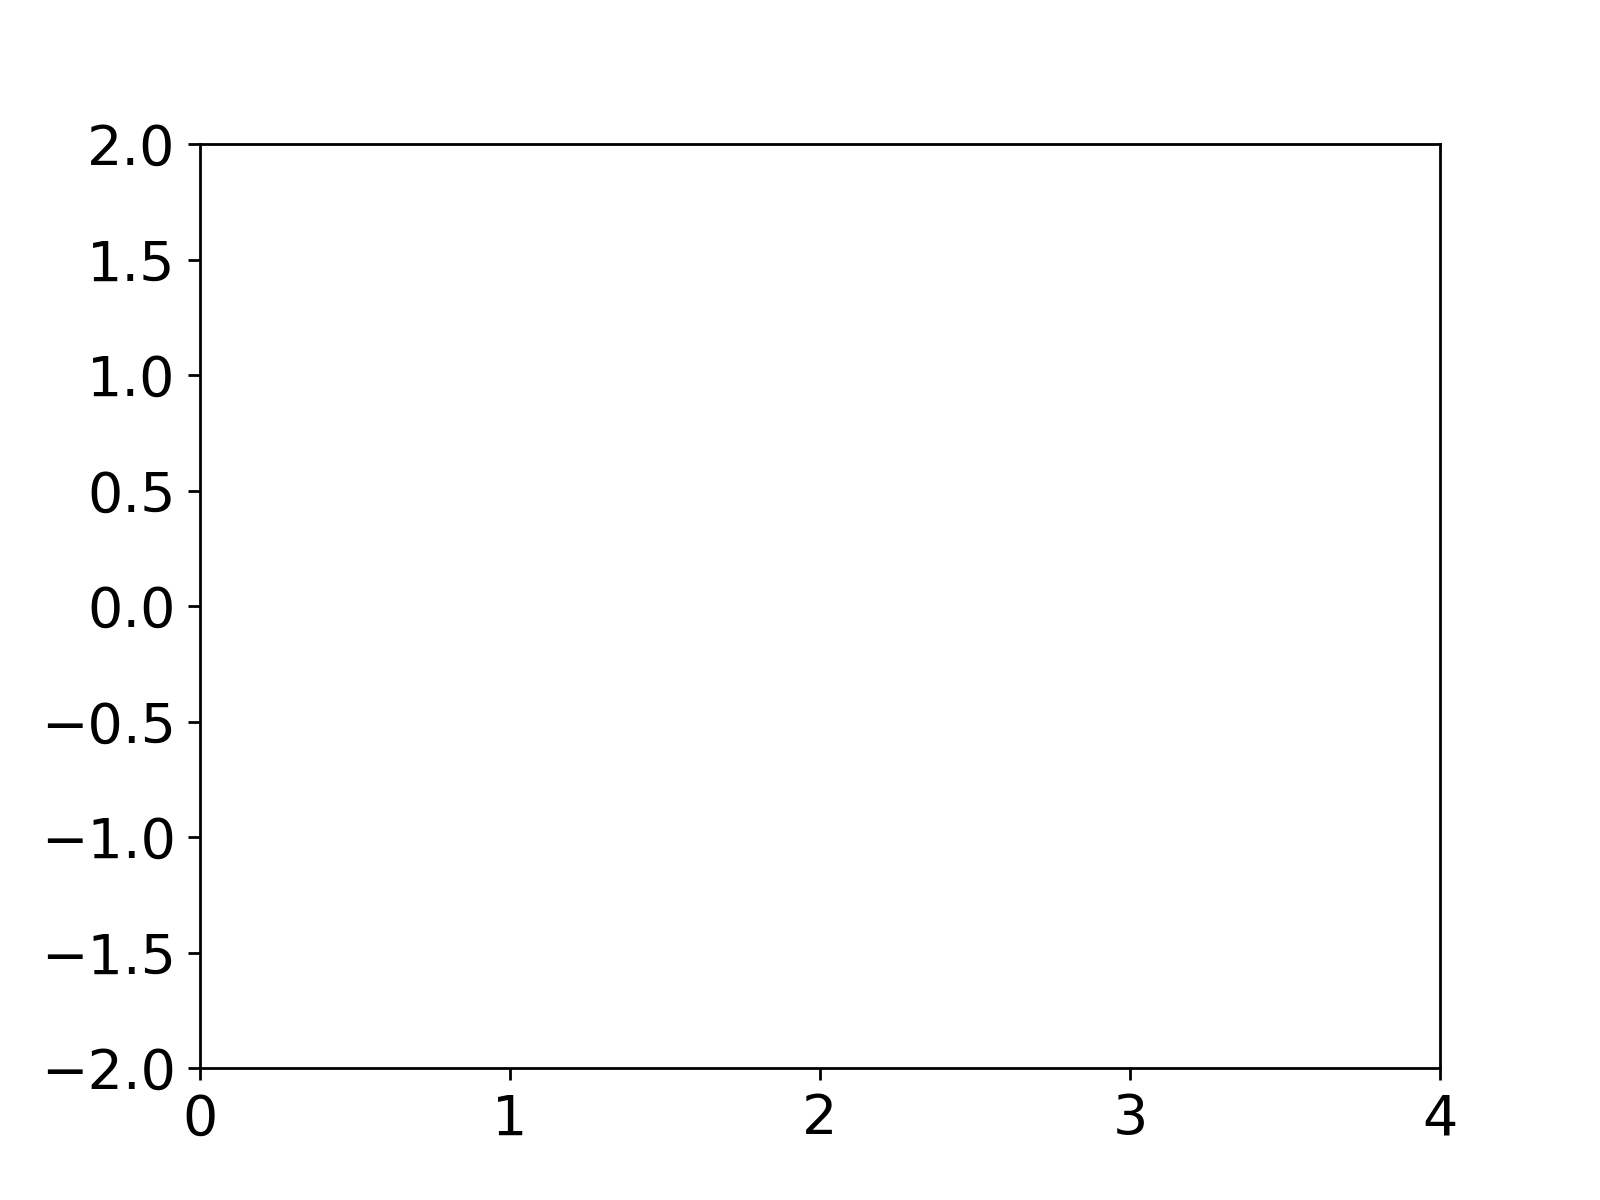

MovieWriter imagemagick unavailable; using Pillow instead.


In [19]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')